In [7]:
import fmna.dataloader as dataloader
import torch

In [8]:
settings = {
    "experiment_name": 'experiment_3',
    "model_name": 'conv_autoencoder_v2_mouse_2_5',
    "path": '../stress_preprocessed',
    "seq_len": 160,
    "n_number": 50
}

## Загрузка и подготовка данных

### Загрузка данных

In [9]:
data = dataloader.loadData(settings['path'])

### Сортировка данных

In [10]:
from fmna.utils import sortBySum

for session in data:
    sortBySum(session[1])

### График наиболее активного нейрона

<Axes: >

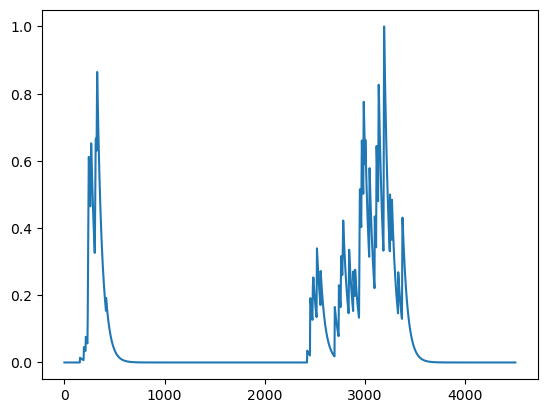

In [11]:
data[0][1].iloc[:, :50].iloc[:, -1].plot()

### Разделение выборки

In [12]:
#Основная линия экспериментов на тренировку
main_line = []

#Тестовые данные
test_data_main_line = []

#После стресса
after_stress = []
#3 часа после стресса
after_3_hours = []
#10 дней после стресса
after_10_days = []


for session in data:
    # Данные тестовой мыши
    if session[0]['animal'] == 'mouse1':
        if session[0]['session'] == 'right_after':
            after_stress.append(session)
        elif session[0]['session'] == '3_hours':
            after_3_hours.append(session)
        elif session[0]['session'] == '10_days':
            after_10_days.append(session)
        else:
            test_data_main_line.append(session)
    # Данные остальных мышей
    if session[0]['animal'] == 'mouse2' or session[0]['animal'] == 'mouse5':
        if session[0]['session'] == 'right_after':
            after_stress.append(session)
        elif session[0]['session'] == '3_hours':
            after_3_hours.append(session)
        elif session[0]['session'] == '10_days':
            after_10_days.append(session)
        else:
            main_line.append(session)
    

In [13]:
for x in test_data_main_line:
    print(x[0])

{'data': 'C', 'animal': 'mouse1', 'session': '17 october exp', 'frame': 4500, 'neuron': 182, 'file': 'mouse1_17 october exp_C.csv'}
{'data': 'C', 'animal': 'mouse1', 'session': '18 october exp', 'frame': 4500, 'neuron': 172, 'file': 'mouse1_18 october exp_C.csv'}
{'data': 'C', 'animal': 'mouse1', 'session': '19 october exp', 'frame': 4500, 'neuron': 183, 'file': 'mouse1_19 october exp_C.csv'}
{'data': 'C', 'animal': 'mouse1', 'session': '20 october exp', 'frame': 4500, 'neuron': 215, 'file': 'mouse1_20 october exp_C.csv'}
{'data': 'C', 'animal': 'mouse1', 'session': '21 october exp', 'frame': 4500, 'neuron': 196, 'file': 'mouse1_21 october exp_C.csv'}


## Обучение сети

### Подготовка загрузчика данных

In [14]:
from fmna.dataset import data_set

train_dataset = data_set(main_line, settings['seq_len'], settings['n_number']) 

In [15]:
train_dataset[0].shape

torch.Size([50, 160])

### Создание модели

In [9]:
from fmna.model import AE
model = AE()

In [10]:
model

AE(
  (encoder): Sequential(
    (0): Conv1d(50, 50, kernel_size=(3,), stride=(1,), padding=(1,))
    (1): ReLU()
    (2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv1d(50, 100, kernel_size=(3,), stride=(1,), padding=(1,))
    (4): ReLU()
    (5): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv1d(100, 200, kernel_size=(3,), stride=(1,), padding=(1,))
    (7): ReLU()
    (8): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv1d(200, 400, kernel_size=(3,), stride=(1,), padding=(1,))
    (10): ReLU()
    (11): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (decoder): Sequential(
    (0): ConvTranspose1d(400, 200, kernel_size=(3,), stride=(2,), padding=(1,), output_padding=(1,))
    (1): ReLU()
    (2): ConvTranspose1d(200, 100, kernel_size=(3,), stride=(2,), padding=(1,), output_padding=(1,))
    (3): ReLU()
    (4): ConvTranspose1d(

### Обучение модели

cuda
Epoch [1/100], Loss: 0.0303
Epoch [2/100], Loss: 0.0303
Epoch [3/100], Loss: 0.0234
Epoch [4/100], Loss: 0.0224
Epoch [5/100], Loss: 0.0200
Epoch [6/100], Loss: 0.0188
Epoch [7/100], Loss: 0.0161
Epoch [8/100], Loss: 0.0148
Epoch [9/100], Loss: 0.0154
Epoch [10/100], Loss: 0.0134
Epoch [11/100], Loss: 0.0124
Epoch [12/100], Loss: 0.0121
Epoch [13/100], Loss: 0.0117
Epoch [14/100], Loss: 0.0106
Epoch [15/100], Loss: 0.0098
Epoch [16/100], Loss: 0.0098
Epoch [17/100], Loss: 0.0090
Epoch [18/100], Loss: 0.0087
Epoch [19/100], Loss: 0.0080
Epoch [20/100], Loss: 0.0081
Epoch [21/100], Loss: 0.0077
Epoch [22/100], Loss: 0.0075
Epoch [23/100], Loss: 0.0068
Epoch [24/100], Loss: 0.0066
Epoch [25/100], Loss: 0.0065
save
Epoch [26/100], Loss: 0.0063
Epoch [27/100], Loss: 0.0057
Epoch [28/100], Loss: 0.0056
Epoch [29/100], Loss: 0.0055
Epoch [30/100], Loss: 0.0054
Epoch [31/100], Loss: 0.0050
Epoch [32/100], Loss: 0.0048
Epoch [33/100], Loss: 0.0046
Epoch [34/100], Loss: 0.0048
Epoch [35/100

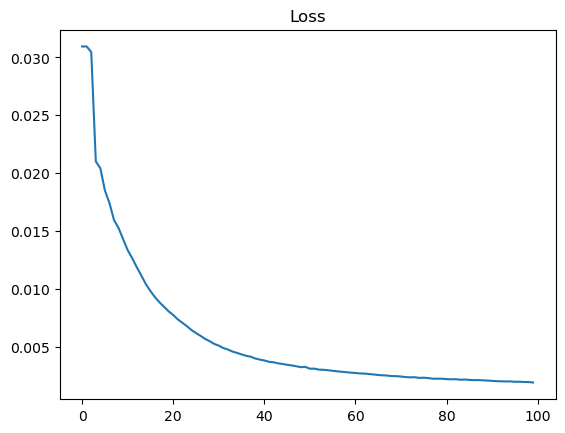

In [12]:
from fmna.train import train
loss = train (train_dataset, model, settings['experiment_name'] + '/' + settings['model_name'], 100)

## Тесты

### Подговка загрузчиков для теста

In [9]:
from fmna.dataset import data_set

test_main = data_set(test_data_main_line, settings['seq_len'], settings['n_number']) 
test_right_after = data_set(after_stress, settings['seq_len'], settings['n_number']) 
test_after_3_hours = data_set(after_3_hours, settings['seq_len'], settings['n_number']) 
test_after_10_days = data_set(after_10_days, settings['seq_len'], settings['n_number']) 

### Функция тестирования

In [10]:
def test(model, data):
    losses = []
    data_loader = torch.utils.data.DataLoader(dataset=data)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(device)
    model.to(device)
    model.eval()
    criterion = torch.nn.MSELoss()
    with torch.no_grad():
        for d in data_loader:
            d = d.to(device)
            recon = model(d)
            losses.append(criterion(recon, d).item())
            torch.cuda.empty_cache()
    return losses

### Тестирование

In [11]:
from fmna.model import AE
model = AE()

print(settings['experiment_name'] + '/' + settings['model_name'] + '_100.pth')

model.load_state_dict(torch.load(settings['experiment_name'] + '/' + settings['model_name'] + '_100.pth'))

loss_main = test(model, test_main)
loss_right_after = test(model, test_right_after)
loss_after_3_hours = test(model, test_after_3_hours)
loss_after_10_days = test(model, test_after_10_days)

experiment_3/conv_autoencoder_v2_mouse_2_5_100.pth
cuda
cuda
cuda
cuda


### Результаты тестирования

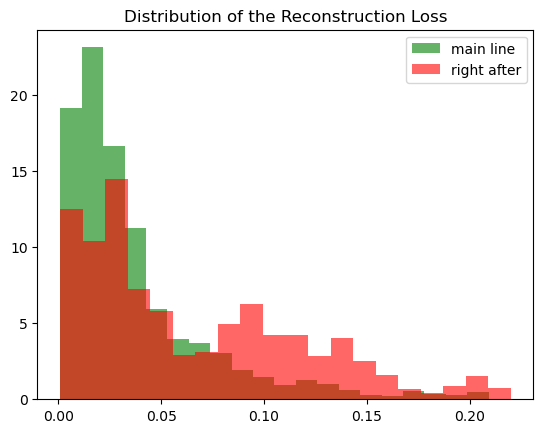

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.hist(loss_main, bins=20, density=True, label="main line", alpha=.6, color="green")
ax.hist(loss_right_after, bins=20, density=True, label="right after", alpha=.6, color="red")


plt.title("Distribution of the Reconstruction Loss")
plt.legend()
plt.savefig(settings['experiment_name'] + '/' + settings['model_name'] + '_100' + '_result_1.1.png')
plt.show()


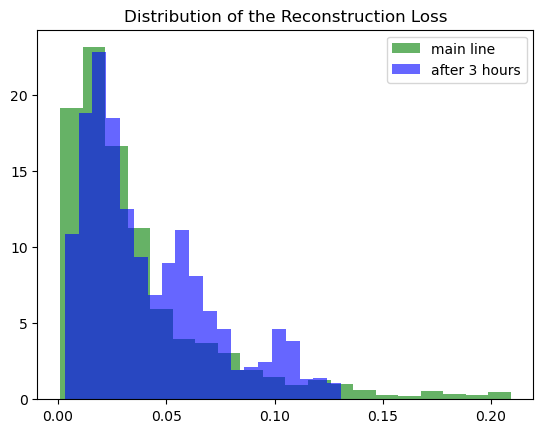

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.hist(loss_main, bins=20, density=True, label="main line", alpha=.6, color="green")
ax.hist(loss_after_3_hours, bins=20, density=True, label="after 3 hours", alpha=.6, color="blue")


plt.title("Distribution of the Reconstruction Loss")
plt.legend()
plt.savefig(settings['experiment_name'] + '/' + settings['model_name'] + '_100' + '_result_2.1.png')
plt.show()

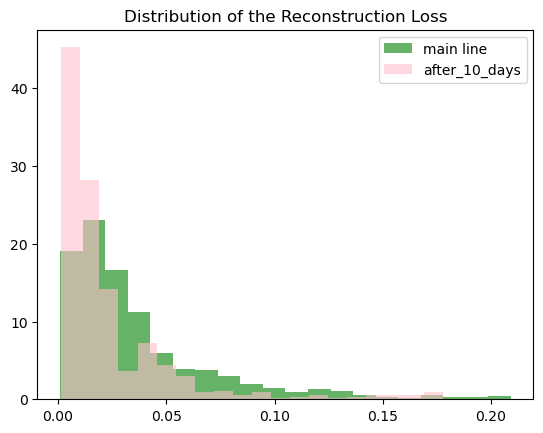

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.hist(loss_main, bins=20, density=True, label="main line", alpha=.6, color="green")
ax.hist(loss_after_10_days, bins=20, density=True, label="after_10_days", alpha=.6, color="pink")


plt.title("Distribution of the Reconstruction Loss")
plt.legend()
plt.savefig(settings['experiment_name'] + '/' + settings['model_name'] + '_100' + '_result_3.1.png')
plt.show()

In [16]:
for x in after_stress:
    print(x[0])

{'data': 'C', 'animal': 'mouse1', 'session': 'right_after', 'frame': 4500, 'neuron': 353, 'file': 'mouse1_right_after_C.csv'}
{'data': 'C', 'animal': 'mouse2', 'session': 'right_after', 'frame': 4500, 'neuron': 156, 'file': 'mouse2_right_after_C.csv'}
{'data': 'C', 'animal': 'mouse5', 'session': 'right_after', 'frame': 4501, 'neuron': 249, 'file': 'mouse5_right_after_C.csv'}


In [18]:
#Основная линия экспериментов на тренировку
main_line_1 = []
main_line_2 = []
main_line_5 = []

#После стресса
after_stress_1 = []
after_stress_2 = []
after_stress_5 = []
#3 часа после стресса
after_3_hours_1 = []
after_3_hours_2 = []
after_3_hours_5 = []
#10 дней после стресса
after_10_days_1 = []
after_10_days_2 = []
after_10_days_5 = []


for session in data:
    if session[0]['animal'] == 'mouse1':
        if session[0]['session'] == 'right_after':
            after_stress_1.append(session)
        elif session[0]['session'] == '3_hours':
            after_3_hours_1.append(session)
        elif session[0]['session'] == '10_days':
            after_10_days_1.append(session)
        else:
            main_line_1.append(session)
    if session[0]['animal'] == 'mouse2':
        if session[0]['session'] == 'right_after':
            after_stress_2.append(session)
        elif session[0]['session'] == '3_hours':
            after_3_hours_2.append(session)
        elif session[0]['session'] == '10_days':
            after_10_days_2.append(session)
        else:
            main_line_2.append(session)
    if session[0]['animal'] == 'mouse5':
        if session[0]['session'] == 'right_after':
            after_stress_5.append(session)
        elif session[0]['session'] == '3_hours':
            after_3_hours_5.append(session)
        elif session[0]['session'] == '10_days':
            after_10_days_5.append(session)
        else:
            main_line_5.append(session)

In [42]:
for x in after_stress_5:
    print(x[0])

{'data': 'C', 'animal': 'mouse5', 'session': 'right_after', 'frame': 4501, 'neuron': 249, 'file': 'mouse5_right_after_C.csv'}


In [31]:
from fmna.dataset import data_set

test_main_1 = data_set(main_line_1, settings['seq_len'], settings['n_number']) 
test_main_2 = data_set(main_line_2, settings['seq_len'], settings['n_number']) 
test_main_5 = data_set(main_line_5, settings['seq_len'], settings['n_number']) 

test_right_after_1 = data_set(after_stress_1, settings['seq_len'], settings['n_number']) 
test_right_after_2 = data_set(after_stress_2, settings['seq_len'], settings['n_number']) 
test_right_after_5 = data_set(after_stress_5, settings['seq_len'], settings['n_number']) 

test_after_3_hours_1 = data_set(after_3_hours_1, settings['seq_len'], settings['n_number']) 
test_after_3_hours_2 = data_set(after_3_hours_2, settings['seq_len'], settings['n_number']) 
test_after_3_hours_5 = data_set(after_3_hours_5, settings['seq_len'], settings['n_number']) 


test_after_10_days_1 = data_set(after_10_days_1, settings['seq_len'], settings['n_number']) 
test_after_10_days_2 = data_set(after_10_days_2, settings['seq_len'], settings['n_number']) 
test_after_10_days_5 = data_set(after_10_days_5, settings['seq_len'], settings['n_number']) 

In [53]:
from fmna.model import AE
model = AE()

settings = {
    "experiment_name": 'experiment_3',
    "model_name": 'conv_autoencoder_v2_mouse_1_5',
    "path": '../stress_preprocessed',
    "seq_len": 160,
    "n_number": 50
}

print(settings['experiment_name'] + '/' + settings['model_name'] + '_100.pth')

model.load_state_dict(torch.load(settings['experiment_name'] + '/' + settings['model_name'] + '_100.pth'))

loss_main_1 = test(model, test_main_1)
loss_main_2 = test(model, test_main_2)
loss_main_5 = test(model, test_main_5)

loss_right_after_1 = test(model, test_right_after_1)
loss_right_after_2 = test(model, test_right_after_2)
loss_right_after_5 = test(model, test_right_after_5)

loss_after_3_hours_1 = test(model, test_after_3_hours_1)
loss_after_3_hours_2 = test(model, test_after_3_hours_2)
loss_after_3_hours_5 = test(model, test_after_3_hours_5)


loss_after_10_days_1 = test(model, test_after_10_days_1)
loss_after_10_days_2 = test(model, test_after_10_days_2)
loss_after_10_days_5 = test(model, test_after_10_days_5)

experiment_3/conv_autoencoder_v2_mouse_1_5_100.pth
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda


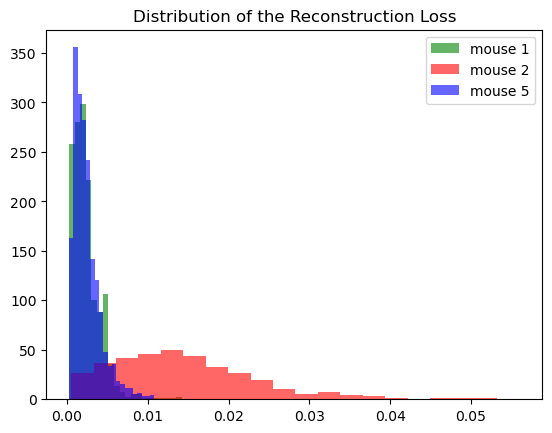

In [54]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.hist(loss_main_1, bins=20, density=True, label="mouse 1", alpha=.6, color="green")
ax.hist(loss_main_2, bins=20, density=True, label="mouse 2", alpha=.6, color="red")
ax.hist(loss_main_5, bins=20, density=True, label="mouse 5", alpha=.6, color="blue")

plt.title("Distribution of the Reconstruction Loss")
plt.legend()
plt.savefig('experiment_4' + '/' + settings['model_name'] + '_100' + '_main_lines.png')
plt.show()

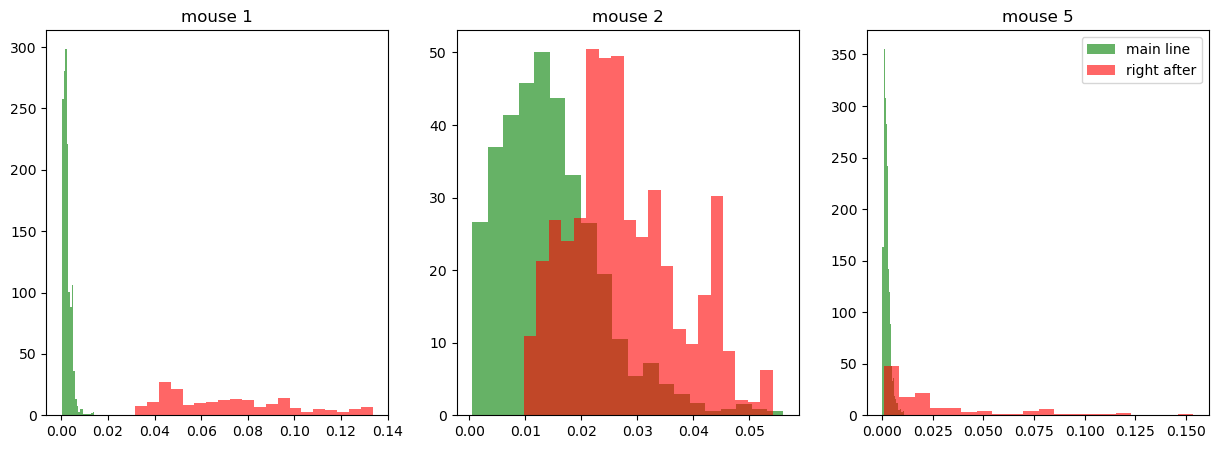

In [55]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].hist(loss_main_1, bins=20, density=True, label="main line", alpha=.6, color="green")
ax[0].hist(loss_right_after_1, bins=20, density=True, label="right after", alpha=.6, color="red")
ax[0].title.set_text("mouse 1")

ax[1].hist(loss_main_2, bins=20, density=True, label="main line", alpha=.6, color="green")
ax[1].hist(loss_right_after_2, bins=20, density=True, label="right after", alpha=.6, color="red")
ax[1].title.set_text("mouse 2")

ax[2].hist(loss_main_5, bins=20, density=True, label="main line", alpha=.6, color="green")
ax[2].hist(loss_right_after_5, bins=20, density=True, label="right after", alpha=.6, color="red")
ax[2].title.set_text("mouse 5")

plt.legend()
plt.savefig('experiment_4' + '/' + settings['model_name'] + '_100' + '_right_after.png')
plt.show()

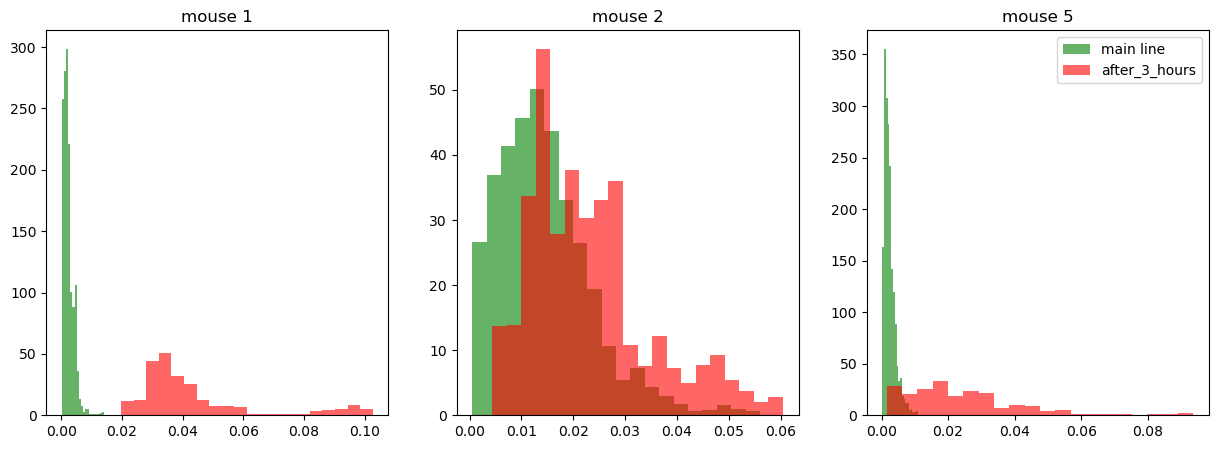

In [56]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].hist(loss_main_1, bins=20, density=True, label="main line", alpha=.6, color="green")
ax[0].hist(loss_after_3_hours_1, bins=20, density=True, label="after_3_hours", alpha=.6, color="red")
ax[0].title.set_text("mouse 1")

ax[1].hist(loss_main_2, bins=20, density=True, label="main line", alpha=.6, color="green")
ax[1].hist(loss_after_3_hours_2, bins=20, density=True, label="after_3_hours", alpha=.6, color="red")
ax[1].title.set_text("mouse 2")

ax[2].hist(loss_main_5, bins=20, density=True, label="main line", alpha=.6, color="green")
ax[2].hist(loss_after_3_hours_5, bins=20, density=True, label="after_3_hours", alpha=.6, color="red")
ax[2].title.set_text("mouse 5")

plt.legend()
plt.savefig('experiment_4' + '/' + settings['model_name'] + '_100' + '_after_3_hours.png')
plt.show()

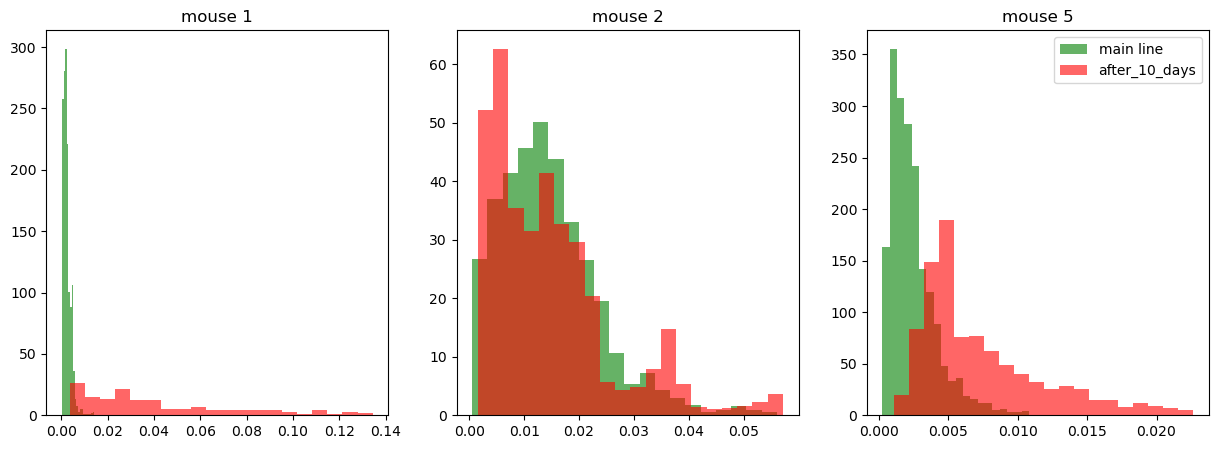

In [57]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].hist(loss_main_1, bins=20, density=True, label="main line", alpha=.6, color="green")
ax[0].hist(loss_after_10_days_1, bins=20, density=True, label="after_10_days", alpha=.6, color="red")
ax[0].title.set_text("mouse 1")

ax[1].hist(loss_main_2, bins=20, density=True, label="main line", alpha=.6, color="green")
ax[1].hist(loss_after_10_days_2, bins=20, density=True, label="after_10_days", alpha=.6, color="red")
ax[1].title.set_text("mouse 2")

ax[2].hist(loss_main_5, bins=20, density=True, label="main line", alpha=.6, color="green")
ax[2].hist(loss_after_10_days_5, bins=20, density=True, label="after_10_days", alpha=.6, color="red")
ax[2].title.set_text("mouse 5")

plt.legend()
plt.savefig('experiment_4' + '/' + settings['model_name'] + '_100' + '_after_10_days.png')
plt.show()

In [20]:
data_loader = torch.utils.data.DataLoader(dataset=train_dataset)

In [21]:
for d in data_loader:
    print(d.shape)
    break

torch.Size([1, 50, 160])



(process:7436): Pango-WARNING **: 12:48:54.599: couldn't load font "Linux libertine Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


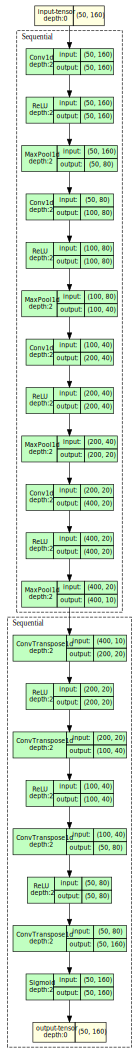

In [34]:
from torchview import draw_graph
from fmna.model import AE
import torch 

model = AE()
# device='meta' -> no memory is consumed for visualization
model_graph = draw_graph(model, input_size=[50, 160], device='meta', expand_nested=True)
model_graph.visual_graph